In [ ]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
local_zip = '/content/drive/MyDrive/hololive_english.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/hololive_english/images'
train_dir = os.path.join(base_dir, 'holo-en-images')
validation_dir = os.path.join(base_dir, 'holo-en-images')

In [ ]:
os.listdir('/tmp/hololive_english/images/holo-en-images')

['kiara', 'ina', 'gura', 'calli', 'ame']

In [ ]:
t_ame_dir = os.path.join(train_dir, 'ame')
t_ina_dir = os.path.join(train_dir, 'ina')
t_gura_dir = os.path.join(train_dir, 'gura')
t_calli_dir = os.path.join(train_dir, 'calli')
t_kiara_dir = os.path.join(train_dir, 'kiara')

In [ ]:
v_ame_dir = os.path.join(validation_dir, 'ame')
v_ina_dir = os.path.join(validation_dir, 'ina')
v_gura_dir = os.path.join(validation_dir, 'gura')
v_calli_dir = os.path.join(validation_dir, 'calli')
v_kiara_dir = os.path.join(validation_dir, 'kiara')

In [ ]:
t_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    validation_split=0.4,
    fill_mode='nearest',
    rotation_range=20,
)

v_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=0.4,
    fill_mode='nearest',
    rotation_range=20,
)

In [ ]:
train_gen = t_datagen.flow_from_directory(
    train_dir,
    batch_size=4,
    class_mode='categorical',
    target_size=(300,300),
    subset='training',
    shuffle=True
)
validation_gen = v_datagen.flow_from_directory(
    validation_dir,
    batch_size=4,
    class_mode='categorical',
    target_size=(300,300),
    subset='validation',
    shuffle=True
)

Found 60 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
    ])

In [ ]:
from keras.optimizers import SGD

opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
      train_gen,
      steps_per_epoch=15, 
      epochs=20, 
      validation_data=validation_gen, 
      validation_steps=10,
      verbose=2
      )

Epoch 1/20
15/15 - 19s - loss: 1.5811 - accuracy: 0.3333 - val_loss: 1.5368 - val_accuracy: 0.4500
Epoch 2/20
15/15 - 18s - loss: 1.4443 - accuracy: 0.5167 - val_loss: 1.4409 - val_accuracy: 0.4000
Epoch 3/20
15/15 - 18s - loss: 1.3581 - accuracy: 0.4833 - val_loss: 1.4147 - val_accuracy: 0.3250
Epoch 4/20
15/15 - 18s - loss: 1.2785 - accuracy: 0.4333 - val_loss: 1.2447 - val_accuracy: 0.6000
Epoch 5/20
15/15 - 18s - loss: 1.1385 - accuracy: 0.4833 - val_loss: 1.1867 - val_accuracy: 0.5250
Epoch 6/20
15/15 - 18s - loss: 0.9637 - accuracy: 0.6167 - val_loss: 1.1533 - val_accuracy: 0.4500
Epoch 7/20
15/15 - 18s - loss: 0.9918 - accuracy: 0.6000 - val_loss: 1.3463 - val_accuracy: 0.3750
Epoch 8/20
15/15 - 18s - loss: 1.1594 - accuracy: 0.4333 - val_loss: 1.2154 - val_accuracy: 0.6000
Epoch 9/20
15/15 - 19s - loss: 0.9891 - accuracy: 0.6833 - val_loss: 1.0910 - val_accuracy: 0.6000
Epoch 10/20
15/15 - 18s - loss: 0.7497 - accuracy: 0.7333 - val_loss: 1.0968 - val_accuracy: 0.6250
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


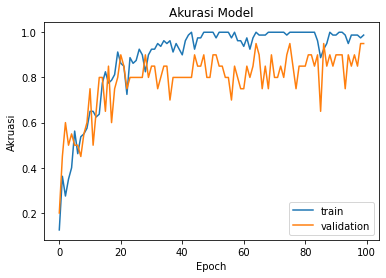

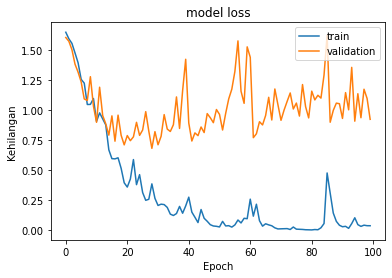

In [ ]:
import matplotlib.pyplot as plt
#menampilkan grafik menggunakan plot
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akruasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Kehilangan')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Saving Calli0.jpg to Calli0 (2).jpg
Calli0.jpg
calli


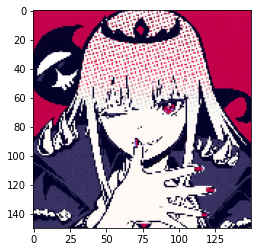

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)

  print(fn)
  if classes[0,0]!=0:
    print('ame')
  elif classes[0,1]!=0:
    print('calli')
  elif classes[0,2]!=0:
    print('gura')
  elif classes[0,3]!=0:
    print('ina')
  else:
    print('kiara')